<a href="https://colab.research.google.com/github/NahidurRahaman/Python_Note_Book/blob/main/panda_day_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
left = pd.DataFrame({"key": ["fool","fool"], "lval":[1,2]})
right = pd.DataFrame({"key": ["fool","fool"], "rval":[4,5]})
left

,key,lval
0,fool,1
1,fool,2


In [3]:
right

,key,rval
0,fool,4
1,fool,5


In [4]:
pd.merge(left, right, on="key")

,key,lval,rval
0,fool,1,4
1,fool,1,5
2,fool,2,4
3,fool,2,5


In [5]:
pd.merge(left, right, on="key", how="outer")

,key,lval,rval
0,fool,1,4
1,fool,1,5
2,fool,2,4
3,fool,2,5


In [6]:
pd.merge(left, right)

,key,lval,rval
0,fool,1,4
1,fool,1,5
2,fool,2,4
3,fool,2,5


In [7]:
df = pd.DataFrame({
    "A": ["a","b","a","a","b","c"],
    "B": ["a","b","a","a","b","c"],
    "C": ["a","b","a","a","b","c"],
    "D":np.random.randn(6),
    "E":np.random.randn(6)
    })
df

,A,B,C,D,E
0,a,a,a,0.558758,-1.713682
1,b,b,b,1.059552,-1.386333
2,a,a,a,0.272607,0.884776
3,a,a,a,1.758385,-0.194879
4,b,b,b,-0.974722,0.168857
5,c,c,c,0.871193,0.988719


In [8]:
df.groupby("A").sum()

,B,C,D,E
A,,,,
a,aaa,aaa,2.589751,-1.023786
b,bb,bb,0.084830,-1.217476
c,c,c,0.871193,0.988719


In [9]:
df.groupby(["A","B"]).sum()

,,C,D,E
A,B,,,
a,a,aaa,2.589751,-1.023786
b,b,bb,0.084830,-1.217476
c,c,c,0.871193,0.988719


# Create a list of tuples using zip and unpacking

In [10]:
tuples = list(zip(*[
    ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
    ["one", "two", "one", "two", "one", "two", "one", "two"]
]))

# Create a MultiIndex from the tuples, with named levels

In [11]:
index = pd.MultiIndex.from_tuples(tuples, names=["first", "second"])

# Create a DataFrame with 8 rows and 2 columns, using the MultiIndex

In [12]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=["A", "B"])

In [13]:
df2 = df[:4]

In [14]:
df2

A         B
first second                    
bar   one    -0.483460  0.903766
      two     0.166593  1.110313
baz   one     1.039194  0.863556
      two     0.930564  0.635664

In [15]:
df

A         B
first second                    
bar   one    -0.483460  0.903766
      two     0.166593  1.110313
baz   one     1.039194  0.863556
      two     0.930564  0.635664
foo   one    -0.540651  0.088589
      two     0.315407 -0.449624
qux   one     0.838739 -0.528307
      two    -0.136216 -0.556749

In [16]:
stacked = df2.stack()

In [17]:
stacked

first  second   
bar    one     A   -0.483460
               B    0.903766
       two     A    0.166593
               B    1.110313
baz    one     A    1.039194
               B    0.863556
       two     A    0.930564
               B    0.635664
dtype: float64

In [18]:
stacked.unstack()

A         B
first second                    
bar   one    -0.483460  0.903766
      two     0.166593  1.110313
baz   one     1.039194  0.863556
      two     0.930564  0.635664

In [19]:
stacked.unstack(1)

second        one       two
first                      
bar   A -0.483460  0.166593
      B  0.903766  1.110313
baz   A  1.039194  0.930564
      B  0.863556  0.635664

In [20]:
stacked.unstack(0)


first          bar       baz
second                      
one    A -0.483460  1.039194
       B  0.903766  0.863556
two    A  0.166593  0.930564
       B  1.110313  0.635664

In [21]:
df = pd.DataFrame({
    "A": ["one", "one", "two", "three"] * 3,
    "B": ["A","B","C"] * 4,
    "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,
    "D": np.random.randn(12),
    "E": np.random.randn(12)
})
df

,A,B,C,D,E
0,one,A,foo,-0.286344,1.526593
1,one,B,foo,-0.061980,0.028598
2,two,C,foo,-0.016480,0.826729
3,three,A,bar,-0.841683,-0.032735
4,one,B,bar,2.177662,0.335031
5,one,C,bar,-1.518056,0.498660
6,two,A,foo,0.870456,-0.705079
7,three,B,foo,0.003010,1.518403
8,one,C,foo,0.973564,0.107063
9,one,A,bar,-0.097297,0.043963


In [22]:
pd.pivot_table(df, values="D", index=["A","B"], columns=["C"])

C             bar       foo
A     B                    
one   A -0.097297 -0.286344
      B  2.177662 -0.061980
      C -1.518056  0.973564
three A -0.841683       NaN
      B       NaN  0.003010
      C -0.000418       NaN
two   A       NaN  0.870456
      B  0.591047       NaN
      C       NaN -0.016480

In [23]:
df = pd.DataFrame({"id":[1,2,3,4,5,6],"Row_grade":["A","B","C","A","B","C"]})
df

,id,Row_grade
0,1,A
1,2,B
2,3,C
3,4,A
4,5,B
5,6,C


In [24]:
df["grade"] = df["Row_grade"].astype("category")
df

,id,Row_grade,grade
0,1,A,A
1,2,B,B
2,3,C,C
3,4,A,A
4,5,B,B
5,6,C,C


In [25]:
df["grade"] = df["grade"].cat.rename_categories(["very good","good","very bad"])

In [26]:
df

,id,Row_grade,grade
0,1,A,very good
1,2,B,good
2,3,C,very bad
3,4,A,very good
4,5,B,good
5,6,C,very bad


In [27]:
df['grade'] = df['grade'].cat.set_categories(["very bad","bad","medium","good","very good"])

In [28]:
df

,id,Row_grade,grade
0,1,A,very good
1,2,B,good
2,3,C,very bad
3,4,A,very good
4,5,B,good
5,6,C,very bad


In [29]:
df.sort_values(by="grade")

,id,Row_grade,grade
2,3,C,very bad
5,6,C,very bad
1,2,B,good
4,5,B,good
0,1,A,very good
3,4,A,very good


In [30]:
df.groupby("grade").size()

<ipython-input-30-586392de31f1>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("grade").size()


,0
grade,
very bad,2
bad,0
medium,0
good,2
very good,2


In [31]:
import matplotlib.pyplot as plt
plt.close("all")

<Axes: >

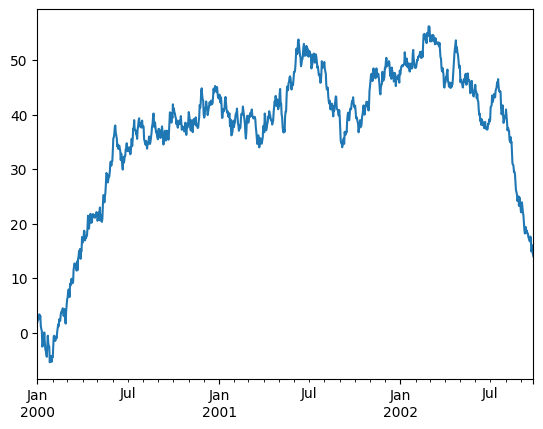

In [32]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))
ts = ts.cumsum()
ts.plot()

<Figure size 640x480 with 0 Axes>

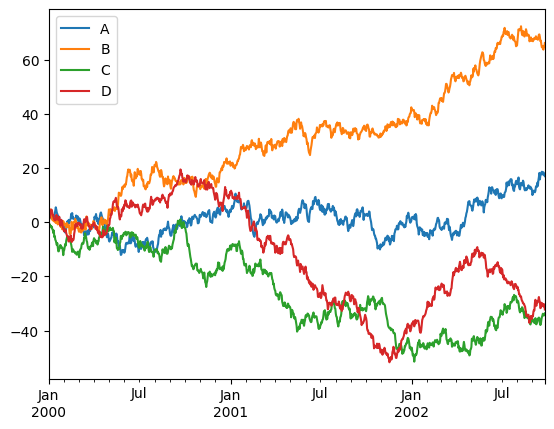

In [33]:
df = pd.DataFrame(np.random.randn(1000,4), index=ts.index, columns=["A","B","C","D"])
df = df.cumsum()
plt.figure()
df.plot()
plt.legend(loc="best")

In [34]:
df.to_csv("foo.csv")
pd.read_csv("foo.csv")

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.584730,2.106362,-0.596094,0.524907
1,2000-01-02,1.396018,1.983790,-0.535528,2.070535
2,2000-01-03,1.886064,3.009273,-0.856724,1.789804
3,2000-01-04,4.126290,4.812895,-1.361571,2.899569
4,2000-01-05,3.416977,4.080601,-1.295079,4.104292
...,...,...,...,...,...
995,2002-09-22,17.675912,64.682263,-33.787825,-30.253671
996,2002-09-23,18.533624,63.854164,-34.178824,-31.100684
997,2002-09-24,18.048911,65.232368,-34.457647,-30.226976
998,2002-09-25,17.334980,64.948967,-34.289259,-30.650796


In [35]:
df.to_hdf("foo.h5", "df")
pd.read_hdf("foo.h5", "df")

<ipython-input-35-196c5bd69001>:1: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  df.to_hdf("foo.h5", "df")


,A,B,C,D
2000-01-01,0.584730,2.106362,-0.596094,0.524907
2000-01-02,1.396018,1.983790,-0.535528,2.070535
2000-01-03,1.886064,3.009273,-0.856724,1.789804
2000-01-04,4.126290,4.812895,-1.361571,2.899569
2000-01-05,3.416977,4.080601,-1.295079,4.104292
...,...,...,...,...
2002-09-22,17.675912,64.682263,-33.787825,-30.253671
2002-09-23,18.533624,63.854164,-34.178824,-31.100684
2002-09-24,18.048911,65.232368,-34.457647,-30.226976
2002-09-25,17.334980,64.948967,-34.289259,-30.650796


In [36]:
df.to_excel("foo.xlsx", sheet_name="Sheet1")
pd.read_excel("foo.xlsx", "Sheet1", index_col=None, na_values=["NA"])

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.584730,2.106362,-0.596094,0.524907
1,2000-01-02,1.396018,1.983790,-0.535528,2.070535
2,2000-01-03,1.886064,3.009273,-0.856724,1.789804
3,2000-01-04,4.126290,4.812895,-1.361571,2.899569
4,2000-01-05,3.416977,4.080601,-1.295079,4.104292
...,...,...,...,...,...
995,2002-09-22,17.675912,64.682263,-33.787825,-30.253671
996,2002-09-23,18.533624,63.854164,-34.178824,-31.100684
997,2002-09-24,18.048911,65.232368,-34.457647,-30.226976
998,2002-09-25,17.334980,64.948967,-34.289259,-30.650796


In [37]:
s= pd.Series(np.random.randn(5), index=["a","b","c","d","e"])
s

,0
a,-0.457019
b,-0.469913
c,-2.615228
d,-1.195549
e,0.232251


In [38]:
d = {"b":1,"a":0,"c":2}
pd.Series(d)

,0
b,1
a,0
c,2


In [39]:
pd.Series(d, index=["b","c","d","a"])

,0
b,1.0
c,2.0
d,NaN
a,0.0


In [40]:
pd.Series(5., index=["a","b","c","d","e"])

,0
a,5.0
b,5.0
c,5.0
d,5.0
e,5.0


In [41]:
s[0]

<ipython-input-41-c9c96910e542>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  s[0]


np.float64(-0.45701878170650184)

In [42]:
s[:3]

,0
a,-0.457019
b,-0.469913
c,-2.615228


In [43]:
s[s>s.median()]

,0
a,-0.457019
e,0.232251


In [44]:
s[[4,3,1]]

<ipython-input-44-8fa15a5a4312>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  s[[4,3,1]]


,0
e,0.232251
d,-1.195549
b,-0.469913


In [45]:
np.exp(s)


,0
a,0.633168
b,0.625057
c,0.073151
d,0.302538
e,1.261437


In [46]:
s.array

<NumpyExtensionArray>
[np.float64(-0.45701878170650184),  np.float64(-0.4699127445239997),
  np.float64(-2.6152281753347273),    np.float64(-1.19554892649526),
  np.float64(0.23225126056771903)]
Length: 5, dtype: float64

In [47]:
s.to_numpy()

array([-0.45701878, -0.46991274, -2.61522818, -1.19554893,  0.23225126])

In [48]:
s["a"]

np.float64(-0.45701878170650184)

In [49]:
s["e"]

np.float64(0.23225126056771903)

In [50]:
np.exp(s)

,0
a,0.633168
b,0.625057
c,0.073151
d,0.302538
e,1.261437


In [51]:
s[1:] + s[:-1]

,0
a,NaN
b,-0.939825
c,-5.230456
d,-2.391098
e,NaN


In [52]:
s= pd.Series(np.random.randn(5),name = "somtheing")

In [53]:
s


,somtheing
0,0.552238
1,-0.910232
2,0.497657
3,1.090837
4,1.322901


In [54]:
s2 = s.rename("different")
s2.name

'different'

In [55]:
d = {
    "one": pd.Series([1.0,2.0,3.0],index=["a","b","c"])
    ,"two": pd.Series([1.0,2.0,3.0,4.0],index=["a","b","c","d"])
}
df = pd.DataFrame(d)
df




,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


In [56]:
pd.DataFrame(d, index=["d","b","a"])

,one,two
d,NaN,4.0
b,2.0,2.0
a,1.0,1.0


In [57]:
pd.DataFrame(d, index=["d","b","a"], columns=["two","three"])

,two,three
d,4.0,NaN
b,2.0,NaN
a,1.0,NaN


In [58]:
df.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [59]:
df.columns

Index(['one', 'two'], dtype='object')

In [60]:
d= {"one":[1.,2.,3.,4.],"two":[4.,3.,2.,1.]}
pd.DataFrame(d)

,one,two
0,1.0,4.0
1,2.0,3.0
2,3.0,2.0
3,4.0,1.0


In [61]:
pd.DataFrame(d, index=["a","b","c","d"])

,one,two
a,1.0,4.0
b,2.0,3.0
c,3.0,2.0
d,4.0,1.0


In [62]:
data = np.zeros((2,), dtype=[("A","i4"),("B","f4"),("C","a10")])
data[:] = [(1,2.0,"hello"),(2,3.0,"world")]
pd.DataFrame(data)

<ipython-input-62-690c49b9be36>:1: DeprecationWarning: Data type alias 'a' was deprecated in NumPy 2.0. Use the 'S' alias instead.
  data = np.zeros((2,), dtype=[("A","i4"),("B","f4"),("C","a10")])


,A,B,C
0,1,2.0,b'hello'
1,2,3.0,b'world'


In [63]:
pd.DataFrame(data, index=["first","second"])

,A,B,C
first,1,2.0,b'hello'
second,2,3.0,b'world'


In [64]:
pd.DataFrame(data, columns=["C","A","B"])

,C,A,B
0,b'hello',1,2.0
1,b'world',2,3.0


In [65]:
data2 = [{"a":1,"b":2},{"a":5,"b":10,"c":7}]
pd.DataFrame(data2)

,a,b,c
0,1,2,NaN
1,5,10,7.0


In [66]:
pd.DataFrame(data2, index=["first","second"])

,a,b,c
first,1,2,NaN
second,5,10,7.0


In [67]:
pd.DataFrame({("a","b"):{("A","B"):1,("A","C"):2},("a","a"):{("A","C"):3,("A","B"):4}})

a   
     b  a
A B  1  4
  C  2  3

In [68]:
pd.DataFrame({
    ("a","b"):{("A","B"):1,("A","C"):2},
    ("a","a"):{("A","C"):3,("A","B"):4},
    ("a","c"):{("A","C"):5,("A","B"):6},
    ("a","c"):{("A","C"):5,("A","B"):6},
    ("a","c"):{("A","C"):5,("A","B"):6}
})

a      
     b  a  c
A B  1  4  6
  C  2  3  5

In [69]:
from collections import namedtuple
Point = namedtuple("Point",["x","y"])
df = pd.DataFrame([Point(0,0), Point(0,3),(2,3)])
df

,x,y
0,0,0
1,0,3
2,2,3


In [70]:
point3D = namedtuple("Point3D","x y z")


In [71]:
pd.DataFrame([point3D(0,0,0),point3D(0,3,0),point3D(2,3,0)])

,x,y,z
0,0,0,0
1,0,3,0
2,2,3,0


In [72]:
from dataclasses import make_dataclass
Point = make_dataclass("Point",[("x",int),("y",int)])
df = pd.DataFrame([Point(0,0),Point(0,3),Point(2,3)])
df

,x,y
0,0,0
1,0,3
2,2,3


In [73]:
pd.DataFrame.from_dict(dict([("A", [1,2,3]),("B",[4,5,6])]))

,A,B
0,1,4
1,2,5
2,3,6


In [74]:
pd.DataFrame.from_dict(dict([("A", [1,2,3]),("B",[4,5,6])]), orient="index", columns=["one","two","three"])

,one,two,three
A,1,2,3
B,4,5,6


In [75]:
pd.DataFrame.from_records(data, index="C")

,A,B
C,,
b'hello',1,2.0
b'world',2,3.0


In [76]:
df = pd.DataFrame.from_dict(dict([("A", [1, 2, 3]), ("B", [4, 5, 6])]), orient="index", columns=["one", "two", "three"])

In [77]:
df["three"] = df["one"] * df["two"]
df["flag"] = df["one"] > 2
df

,one,two,three,flag
A,1,2,2,False
B,4,5,20,True


In [78]:
del df["two"]
three = df.pop("three")
df

,one,flag
A,1,False
B,4,True


In [79]:
df["foo"] = "bar"
df

,one,flag,foo
A,1,False,bar
B,4,True,bar


In [80]:
df["one_trunc"] = df["one"][:2]
df

,one,flag,foo,one_trunc
A,1,False,bar,1
B,4,True,bar,4


In [81]:
df.insert(1,"bar",df["one"])
df

,one,bar,flag,foo,one_trunc
A,1,1,False,bar,1
B,4,4,True,bar,4


In [82]:
from google.colab import drive
drive.mount('/content/mydrive/')

Mounted at /content/mydrive/


In [83]:
iris = pd.read_csv("/content/mydrive/MyDrive/Iris.csv") # If the file is in the current working directory

In [84]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [85]:
iris.assign(sepal_ratio = iris["SepalWidthCm"] / iris["SepalLengthCm"]).head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,sepal_ratio
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0.686275
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0.612245
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0.680851
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0.673913
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0.720000


In [86]:
iris.assign(sepal_ratio = lambda x: (x["SepalWidthCm"] / x["SepalLengthCm"])).head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,sepal_ratio
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0.686275
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0.612245
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0.680851
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0.673913
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0.720000


<Axes: xlabel='SepalRatio', ylabel='PetalWidthCm'>

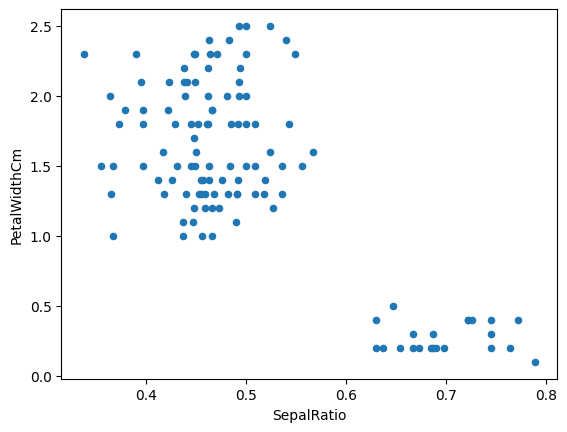

In [88]:
iris.query("SepalLengthCm > 5").assign(SepalRatio = lambda x: x["SepalWidthCm"] / x["SepalLengthCm"]).plot(kind="scatter", x="SepalRatio", y="PetalWidthCm")

In [89]:
dfa = pd.DataFrame({"A":[1,2,3],"B":[4,5,6]})
dfa.assign(C=lambda x: x["A"] + x["B"], D=lambda x: x["A"] + x["C"])

,A,B,C,D
0,1,4,5,6
1,2,5,7,9
2,3,6,9,12


In [90]:
df = pd.DataFrame(np.random.rand(10,4),columns=["A","B","C","D"])
df2 = pd.DataFrame(np.random.rand(7,3),columns=["A","B","C"])
df + df2

,A,B,C,D
0,1.442209,0.666290,0.547059,NaN
1,0.614641,1.150500,1.118327,NaN
2,0.954854,1.373641,0.987487,NaN
3,0.623860,0.453386,0.906936,NaN
4,0.874645,1.499868,1.127365,NaN
5,0.626493,0.989931,0.535003,NaN
6,1.538779,1.392862,0.975152,NaN
7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN


In [91]:
df1 = pd.DataFrame({"a":[1,0,1],"b":[0,1,1]},dtype=bool)
df2 = pd.DataFrame({"a":[0,1,1],"b":[1,1,0]},dtype=bool)
df1 & df2

,a,b
0,False,False
1,False,True
2,True,False


In [92]:
df1 | df2

,a,b
0,True,True
1,True,True
2,True,True


In [93]:
df1 ^ df2

,a,b
0,True,True
1,True,False
2,False,True


In [94]:
-df1

,a,b
0,False,True
1,True,False
2,False,False


In [95]:
np.exp(df)

,A,B,C,D
0,2.140268,1.459756,1.454105,1.622655
1,1.602237,1.504775,1.746444,1.510190
2,1.902957,1.548270,2.620828,2.184124
3,1.812303,1.167574,2.147585,2.025143
4,1.660488,1.901395,2.118557,1.078127
5,1.245668,1.589481,1.331868,2.421026
6,2.519569,2.005971,2.574778,2.358497
7,1.135092,1.093438,1.854465,1.175541
8,1.274857,1.197234,1.457331,1.423492
9,2.255506,1.206638,1.852927,1.203961


In [96]:
ser = pd.Series([1,2,3,4])
np.exp(ser)

,0
0,2.718282
1,7.389056
2,20.085537
3,54.598150


In [97]:
ser1 = pd.Series([1,2,3,4],index=["a","b","c","d"])
ser2 = pd.Series([1,2,3,4],index=["b","c","d","a"])
ser1 + ser2

,0
a,5
b,3
c,5
d,7


In [98]:
np.remainder(ser1,ser2)

,0
a,1
b,0
c,1
d,1


In [100]:
ser3 = pd.Series([1,2,3],index=["b","c","d"])
np.remainder(ser1,ser3)

,0
a,NaN
b,0.0
c,1.0
d,1.0


In [101]:
ser = pd.Series([1,2,3])
idx = pd.Index([4,5,6])
np.maximum(ser,idx)

,0
0,4
1,5
2,6


In [102]:
pd.DataFrame(np.random.randn(3,12))

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.461587,-0.052024,0.430277,1.007357,0.405835,0.101957,-0.052941,0.816946,-0.950522,0.166716,2.175811,-0.864938
1,0.938893,-1.757312,0.196726,0.788426,0.936107,-0.788160,0.811361,1.766388,-1.363323,0.320017,-0.184988,0.530781
2,0.891573,0.684481,-0.090810,0.587577,-0.622957,-0.318827,-2.461887,-0.973143,0.024401,-0.612483,-1.221752,-1.418126


In [103]:
pd.set_option("display.width",40)
pd.DataFrame(np.random.randn(3,12))

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.980664,1.499408,0.097535,-0.798685,0.623242,-0.597803,0.686308,-0.074702,-0.146573,-0.500011,-1.549206,0.958098
1,1.544785,0.343579,0.088517,-1.236013,0.979266,0.185223,-0.247535,-3.224851,-0.002230,-0.160577,0.048186,0.111420
2,-1.783199,0.535368,0.218818,0.536381,-0.750306,-0.577278,0.917584,0.235168,-0.977897,-0.163858,0.371008,0.144264


In [109]:
datafile = {
    "filename": ["filename_01", "filename_02"],
    "path": [
        "media/user_name/storage/folder_01/filename_01",
        "media/user_name/storage/folder_02/filename_02",
    ]
}

# Set display option to control column width
pd.set_option("display.max_colwidth", 30)

# Create and display DataFrame
pd.DataFrame(datafile)


,filename,path
0,filename_01,media/user_name/storage/fo...
1,filename_02,media/user_name/storage/fo...


In [110]:
df = pd.DataFrame({"foo1" : np.random.randn(5),"foo2" : np.random.rand(5)})
df

,foo1,foo2
0,0.713576,0.367233
1,0.294688,0.307133
2,-0.946221,0.518793
3,-1.189172,0.151384
4,-0.015198,0.823189


In [111]:
index = pd.date_range("1/1/2000", periods=8)
s = pd.Series(np.random.randn(5), index=["a", "b", "c", "d", "e"])
df = pd.DataFrame(np.random.randn(8, 3), index=index, columns=list("ABC"))
df

,A,B,C
2000-01-01,1.727272,-1.453826,0.059270
2000-01-02,-0.728215,1.457213,0.626911
2000-01-03,-1.225832,-0.374976,0.061575
2000-01-04,-0.366835,1.126718,-0.293782
2000-01-05,0.013194,-0.708848,-1.889623
2000-01-06,0.185637,1.256011,-1.167225
2000-01-07,-0.612673,1.275951,1.420446
2000-01-08,1.052371,-0.048513,-0.017191


In [112]:
long_series = pd.Series(np.random.randn(1000))
long_series.head()

,0
0,0.736989
1,-1.148305
2,-0.287102
3,-0.557856
4,1.682896


In [113]:
df[:2]

,A,B,C
2000-01-01,1.727272,-1.453826,0.059270
2000-01-02,-0.728215,1.457213,0.626911


In [114]:
df.columns = [x.lower() for x in df.columns]
df

,a,b,c
2000-01-01,1.727272,-1.453826,0.059270
2000-01-02,-0.728215,1.457213,0.626911
2000-01-03,-1.225832,-0.374976,0.061575
2000-01-04,-0.366835,1.126718,-0.293782
2000-01-05,0.013194,-0.708848,-1.889623
2000-01-06,0.185637,1.256011,-1.167225
2000-01-07,-0.612673,1.275951,1.420446
2000-01-08,1.052371,-0.048513,-0.017191


In [116]:
s.array

<NumpyExtensionArray>
[np.float64(-0.13933679808835858),
  np.float64(-0.3127174614700913),
   np.float64(0.7813066707085545),
  np.float64(-0.7102681008594091),
   np.float64(0.7946701156904217)]
Length: 5, dtype: float64

In [117]:
s.index.array

<NumpyExtensionArray>
['a', 'b', 'c', 'd', 'e']
Length: 5, dtype: object